# **Feature Engineering**

En esta parte realizaremos la seleccion y extraccion de las características para poder aplicar los Modelos de ML posteriormente.

## Librerías

In [1514]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import pickle

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet 
from xgboost import XGBRegressor

# Over sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error #Regresion 


# preprocessing
from sklearn.preprocessing import StandardScaler # Estandarización
from sklearn.preprocessing import normalize # Normalizacion
from sklearn.preprocessing import MaxAbsScaler # Escalado Max absoluto
from sklearn.preprocessing import MinMaxScaler # Escalado Min- Max
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_validate, StratifiedKFold, cross_val_score, cross_val_predict

# Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_colwidth = None

## Carga del Dataset 

In [1515]:
df = pd.read_csv('/Users/santi/Bootcamp/Salarios en STEM/src/data/processed/data_procesado.csv')
df

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country
0,2017-06,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,...,0,0,0,0,0,Unknown,Unknown,Redwood City,CA,United States
1,2017-06,eBay,SE 2,Software Engineer,100000,100000.0,0.0,0.0,"San Francisco, CA",5.0,...,0,0,0,0,0,Unknown,Unknown,San Francisco,CA,United States
2,2017-06,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
3,2017-06,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,...,0,0,0,0,0,Unknown,Unknown,Sunnyvale,CA,United States
4,2017-06,Microsoft,60,Software Engineer,157000,157000.0,0.0,0.0,"Mountain View, CA",5.0,...,0,0,0,0,0,Unknown,Unknown,Mountain View,CA,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,2018-09,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
50695,2018-09,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,...,0,0,0,0,0,Unknown,Unknown,Redmond,WA,United States
50696,2018-09,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
50697,2018-09,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,...,0,0,0,0,0,Unknown,Unknown,San Francisco,CA,United States


> Al finalizar la limpieza de datos y luego del EDA se llego a la conclusión de que lo mas conveniente es centrarnos solo en los datos provenientes de companias en EE.UU ya que representan el 89% del dataset, lo cual predecir a nivel global/mundial no sería posible ya que hay un claro desbalanceo de los datos y dicho dataset no refleja una representacion equilibrada a nivel mundial.



In [1516]:
df = df[(df['country']=='United States')]
df

,timestamp,company,level,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,location,yearsofexperience,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country
0,2017-06,Oracle,L3,Product Manager,127000,107000.0,20000.0,10000.0,"Redwood City, CA",1.5,...,0,0,0,0,0,Unknown,Unknown,Redwood City,CA,United States
1,2017-06,eBay,SE 2,Software Engineer,100000,100000.0,0.0,0.0,"San Francisco, CA",5.0,...,0,0,0,0,0,Unknown,Unknown,San Francisco,CA,United States
2,2017-06,Amazon,L7,Product Manager,310000,155000.0,0.0,0.0,"Seattle, WA",8.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
3,2017-06,Apple,M1,Software Engineering Manager,372000,157000.0,180000.0,35000.0,"Sunnyvale, CA",7.0,...,0,0,0,0,0,Unknown,Unknown,Sunnyvale,CA,United States
4,2017-06,Microsoft,60,Software Engineer,157000,157000.0,0.0,0.0,"Mountain View, CA",5.0,...,0,0,0,0,0,Unknown,Unknown,Mountain View,CA,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,2018-09,Google,T4,Software Engineer,327000,155000.0,150000.0,22000.0,"Seattle, WA",10.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
50695,2018-09,Microsoft,62,Software Engineer,237000,146900.0,73200.0,16000.0,"Redmond, WA",2.0,...,0,0,0,0,0,Unknown,Unknown,Redmond,WA,United States
50696,2018-09,MSFT,63,Software Engineer,220000,157000.0,25000.0,20000.0,"Seattle, WA",14.0,...,0,0,0,0,0,Unknown,Unknown,Seattle,WA,United States
50697,2018-09,Salesforce,Lead MTS,Software Engineer,280000,194688.0,57000.0,29000.0,"San Francisco, CA",8.0,...,0,0,0,0,0,Unknown,Unknown,San Francisco,CA,United States


In [1517]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'basesalary', 'stockgrantvalue', 'bonus', 'location',
       'yearsofexperience', 'yearsatcompany', 'gender', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Race', 'Education', 'city', 'state', 'country'],
      dtype='object')

Eliminamos las columnas que no son relevantes y que no nos aportan información:
* `timestamp`
* `company`
* `level`
* `stockgrantvalue`
* `bonus`
* `location`
* `yearsatcompany`
* `Race`
* `city`
* `country`

In [1518]:
# Nos quedaos con las siguientes columnas
df = df[['title', 'basesalary','totalyearlycompensation','yearsofexperience', 'gender',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic','Education','state']]
df

,title,basesalary,totalyearlycompensation,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,state
0,Product Manager,107000.0,127000,1.5,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
1,Software Engineer,100000.0,100000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
2,Product Manager,155000.0,310000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
3,Software Engineering Manager,157000.0,372000,7.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
4,Software Engineer,157000.0,157000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,Software Engineer,155000.0,327000,10.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50695,Software Engineer,146900.0,237000,2.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50696,Software Engineer,157000.0,220000,14.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50697,Software Engineer,194688.0,280000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA


In [1519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50699 entries, 0 to 50698
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    50699 non-null  object 
 1   basesalary               50699 non-null  float64
 2   totalyearlycompensation  50699 non-null  int64  
 3   yearsofexperience        50699 non-null  float64
 4   gender                   50699 non-null  object 
 5   Masters_Degree           50699 non-null  int64  
 6   Bachelors_Degree         50699 non-null  int64  
 7   Doctorate_Degree         50699 non-null  int64  
 8   Highschool               50699 non-null  int64  
 9   Some_College             50699 non-null  int64  
 10  Race_Asian               50699 non-null  int64  
 11  Race_White               50699 non-null  int64  
 12  Race_Two_Or_More         50699 non-null  int64  
 13  Race_Black               50699 non-null  int64  
 14  Race_Hispanic         

## 1. Outliers

**¿Qué hacemos con los outliers? No hay una regla para el tratamiento de los mismos**, pero en este caso realizaremos los siguientes pasos:
* 1° Opción: Eliminarlos si superan  1.5 * IQR (Rango Intercuartílico)


In [1520]:
# Creamos una funcion para visualizar Outliers y la Distribucion de la variable
def distribucion(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex= True, figsize= (8,5), gridspec_kw={'height_ratios': (.2,.8)})
    ax[0].set_title(title, fontsize= 18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean'+' '+str(np.round(df[col].mean(),1))+' '+symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median'+' '+str(np.round(df[col].median(),1))+' '+symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode'+' '+str(np.round(df[col].mode()[0],1))+' '+symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow= True, frameon= True)
    plt.tight_layout()
    plt.show()

### `basesalary`

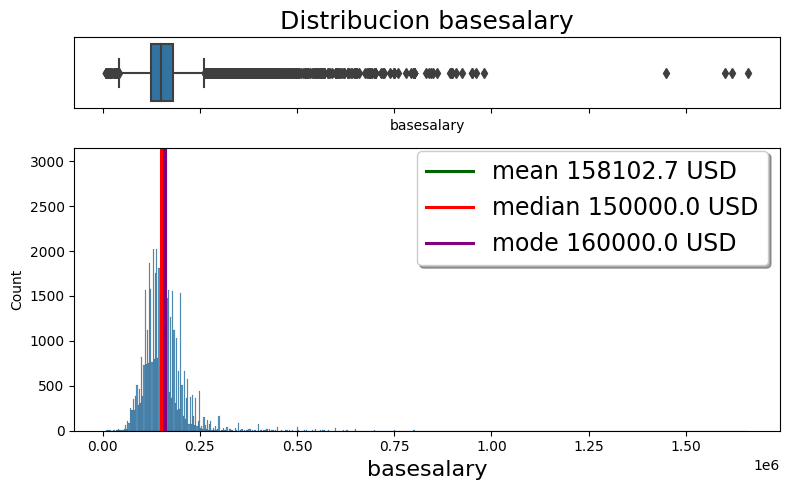

In [1521]:
distribucion(df, 'basesalary', 'Distribucion basesalary', 'USD')

Hay muchos outliers. Vamos a eliminar aquellos valores donde `basesalary>1.5*IQR(Rango Intercuartilico)`

In [1522]:
p_0 = np.percentile(df['basesalary'], 0) #Q0 #Min
p_25 = np.percentile(df['basesalary'], 25) #Q1
p_50 = np.percentile(df['basesalary'], 50) #Q2 #Mediana
p_75 = np.percentile(df['basesalary'], 75) #Q3
p_100 = np.percentile(df['basesalary'], 100) #Q4 #Max
iqr = p_75-p_25
print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Rango intercuartilico:",iqr)

Valor del percentil 0: 10000.0
Valor del percentil 25: 125000.0
Valor del percentil 50: 150000.0
Valor del percentil 75: 180000.0
Valor del percentil 100: 1659870.0
Rango intercuartilico: 55000.0


In [1523]:
1.5*iqr

82500.0

In [1524]:
df.loc[df['basesalary']<1.5*iqr]

,title,basesalary,totalyearlycompensation,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,state
54,Product Manager,72000.0,120000,3.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
105,Software Engineer,12500.0,150000,1.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
170,Software Engineer,80000.0,84000,3.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,TX
279,Software Engineer,72000.0,72000,3.0,Male,0,0,0,0,0,0,0,0,0,0,Unknown,SC
294,Software Engineer,16100.0,280000,4.0,Male,0,0,0,0,0,0,0,0,0,0,Unknown,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50329,Software Engineer,80500.0,82000,12.0,Male,0,0,0,0,0,0,0,0,0,0,Unknown,IL
50331,Software Engineer,79200.0,88000,3.0,Male,0,0,0,0,0,0,0,0,0,0,Unknown,MI
50336,Software Engineer,65000.0,72000,0.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,GA
50337,Software Engineer,63000.0,72000,0.0,Male,0,0,0,0,0,0,0,0,0,0,Unknown,TX


> Como se reduce casi totalmente el dataset no utilizaremos los datos <1.5*iqr, es decir, descartaremos la Opción 1 debido a la gran pérdida de datos que se genera.

* 2° Opción: observar a traves de un grafico boxplot y tomar un rango para no tener en cuenta los outliers

<AxesSubplot: >

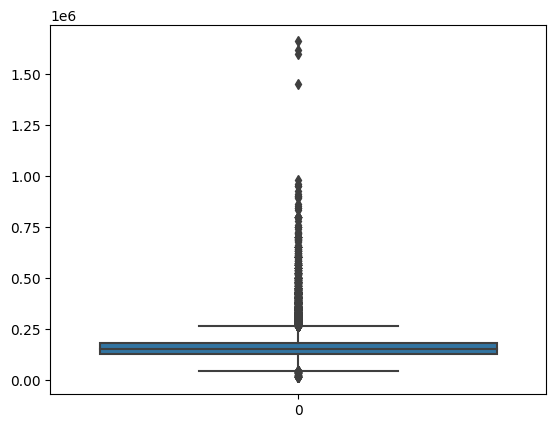

In [1525]:
# Graficamos boxplot para ver los outliers
sns.boxplot(df['basesalary'])


Observando los percentiles y el grafico optamos por utilizar el rango  50000 < basesalary < 240000

In [1526]:
df = df.loc[(df['basesalary']>50000) & (df['basesalary']<240000)]
df

,title,basesalary,totalyearlycompensation,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,state
0,Product Manager,107000.0,127000,1.5,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
1,Software Engineer,100000.0,100000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
2,Product Manager,155000.0,310000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
3,Software Engineering Manager,157000.0,372000,7.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
4,Software Engineer,157000.0,157000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,Software Engineer,155000.0,327000,10.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50695,Software Engineer,146900.0,237000,2.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50696,Software Engineer,157000.0,220000,14.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50697,Software Engineer,194688.0,280000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA


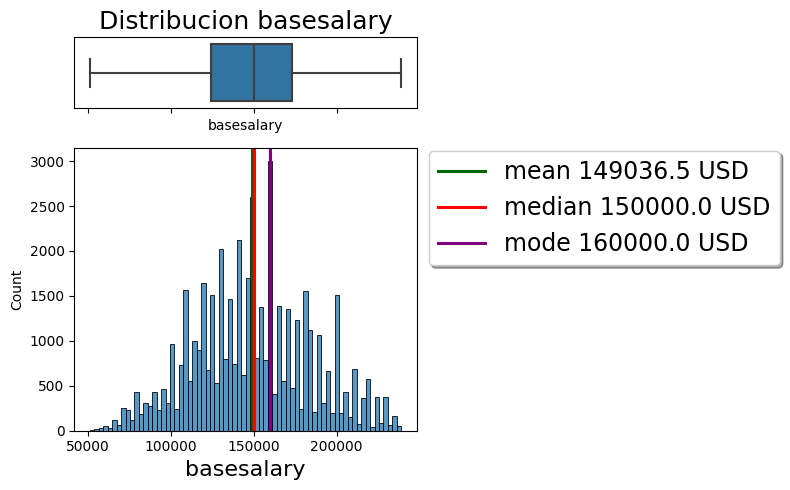

In [1527]:
distribucion(df, 'basesalary', 'Distribucion basesalary', 'USD')

Para 50000 USD < `basesalary` < 240000 USD ya no tenemos outliers y logramos no reducir demasiado el dataset.

***
### `yearsofexperience`

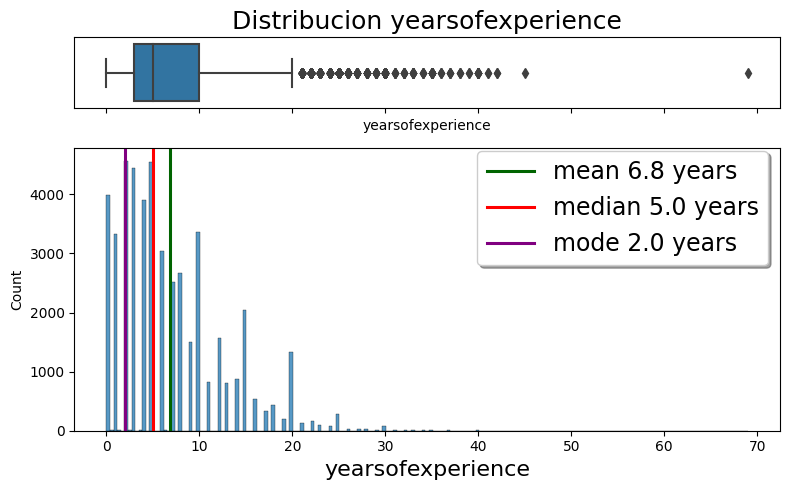

In [1528]:
distribucion(df, 'yearsofexperience', 'Distribucion yearsofexperience', 'years')

In [1529]:
df.yearsofexperience.unique()

array([ 1.5 ,  5.  ,  8.  ,  7.  ,  8.5 , 15.  ,  4.  ,  3.  , 12.  ,
       16.  , 10.  ,  1.  ,  9.  , 17.  , 14.  ,  6.  , 20.  , 13.  ,
       19.  ,  0.5 ,  2.  , 11.  , 23.  ,  0.  , 11.5 ,  3.5 , 22.  ,
        6.5 ,  2.5 , 21.  ,  3.8 ,  7.5 , 37.  ,  0.8 ,  6.75, 18.  ,
       38.  , 24.  , 30.  ,  0.58,  5.5 , 25.  ,  1.6 , 32.  , 26.  ,
       34.  , 29.  , 28.  , 27.  , 33.  , 40.  , 35.  , 39.  , 42.  ,
       41.  ,  0.3 ,  0.25, 31.  , 36.  , 45.  , 69.  ,  4.5 ,  0.6 ,
        1.4 , 10.5 ])

<AxesSubplot: >

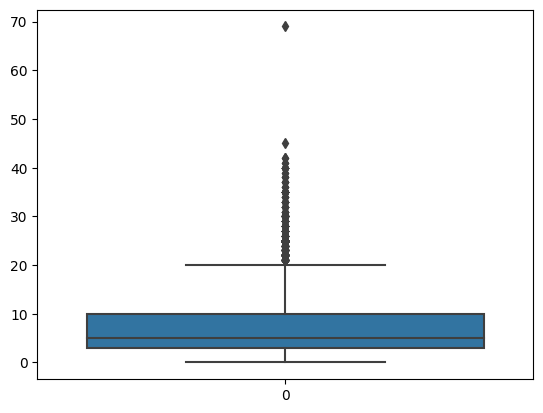

In [1530]:
# Graficamos boxplot para ver los outliers
sns.boxplot(df['yearsofexperience'])

In [1531]:
p_0 = np.percentile(df['yearsofexperience'], 0) #Q0 #Min
p_25 = np.percentile(df['yearsofexperience'], 25) #Q1
p_50 = np.percentile(df['yearsofexperience'], 50) #Q2 #Mediana
p_75 = np.percentile(df['yearsofexperience'], 75) #Q3
p_100 = np.percentile(df['yearsofexperience'], 100) #Q4 #Max
iqr = p_75-p_25
print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Rango intercuartilico:",iqr)

Valor del percentil 0: 0.0
Valor del percentil 25: 3.0
Valor del percentil 50: 5.0
Valor del percentil 75: 10.0
Valor del percentil 100: 69.0
Rango intercuartilico: 7.0


Para evitar una reduccion notable del dataset, realizaremos el mismo tratamiento que se realizo en basesalary, es decir, utilizando la Opción 2: obervando el grafico Boxplot, tomamos los datos correspondientes a yearsofexperience < 20.

In [1532]:
df = df.loc[(df['yearsofexperience']<20)]
df

,title,basesalary,totalyearlycompensation,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,state
0,Product Manager,107000.0,127000,1.5,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
1,Software Engineer,100000.0,100000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
2,Product Manager,155000.0,310000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
3,Software Engineering Manager,157000.0,372000,7.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
4,Software Engineer,157000.0,157000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,Software Engineer,155000.0,327000,10.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50695,Software Engineer,146900.0,237000,2.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50696,Software Engineer,157000.0,220000,14.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA
50697,Software Engineer,194688.0,280000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA


<AxesSubplot: >

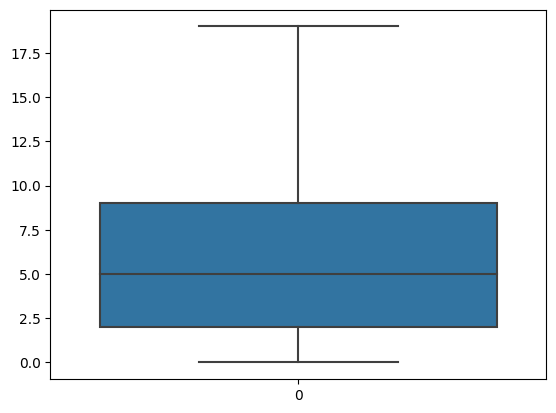

In [1533]:
# Graficamos boxplot para ver los outliers
sns.boxplot(df['yearsofexperience'])

> Si bien no es la manera correcta para el tratamiento de los outliers, en este caso, se considero necesaria para evitar una reducción notable del dataset. Además para no afectar la calidad y legitimidad de los datos, se optó por no imputar los outliers por la Media / Mediana / Moda agrupaciones o clúster (Kmeans).

## 2. Imputaciones Datos Faltantes

> En el caso de las features `gender` y `Education`, los datos faltantes fueron renombrados por 'Unknown', ya que al ser datos cargados por el usuario y luego de analizar la fuente del dataset se llego a la conclusión que aquellos datos faltantes mas bien corresponden a datos que el usuario no quiso proporcionar o no le pareció relevante. Si bien no se les realiza ninguna imputación, para no afectar la veracidad de los datos, se los tendrán en cuenta por el motivo mencionado anteriormente.

### `gender`

In [1534]:
df.gender.unique()

array(['Unknown', 'Male', 'Female'], dtype=object)

### `Education`

In [1535]:
df.Education.unique()

array(['Unknown', 'PhD', "Master's Degree", "Bachelor's Degree",
       'Some College', 'Highschool'], dtype=object)

> Para la variable target `basesalary` aquellos datos faltantes se los imputa por el valor de `totalyearlycompensation`

In [1536]:
# Imputamos los nulos
df['basesalary'][df['basesalary']==0] = df['totalyearlycompensation']

# Check de nulos
df[df['basesalary']==0]

,title,basesalary,totalyearlycompensation,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,state


## 3. Transformación Variables Categóricas

La columnas [`Masters_Degree`, `Bachelors_Degree`,`Doctorate_Degree`, `Highschool`, `Some_College`, `Race_Asian`,
       `Race_White`, `Race_Two_Or_More`, `Race_Black`, `Race_Hispanic`] ya están transformadas por lo tanto no las modificaremos.

Las columnas Categóricas [`title`, `gender`, `state`] las transformaremos a traves del Metodo **OHE (One Hot Encoding)**

* 1°) Clasterizamos/Agrupamos por Region los States, creando la columna Region

In [1537]:
# Creamos una lista por cada Region de EE.UU: 4 (Northeast, Southt, West and Midwest)
northeast = ['PA', 'NJ', 'NY', 'CT', 'RI', 'MA', 'NY', 'VT', 'NH', 'ME']
south = ['OK', 'TX', 'AR', 'LA', 'MS' , 'AL', 'TN' , 'KY', 'FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'MD', 'DE']
west = ['DC','WA','OR','CA','AZ', 'NM', 'CO', 'UT', 'NV', 'WY', 'ID', 'MT','HI']
midwest = ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'IL', 'IN', 'OH', 'MI']


# Localizamos en el df los paises por region y creamos una columna 'region'
df.loc[df['state'].isin(northeast),'region']= 'northeast'
df.loc[df['state'].isin(south),'region']= 'south'
df.loc[df['state'].isin(west),'region']= 'west'
df.loc[df['state'].isin(midwest),'region']= 'midwest'
df



,title,basesalary,totalyearlycompensation,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,state,region
0,Product Manager,107000.0,127000,1.5,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west
1,Software Engineer,100000.0,100000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west
2,Product Manager,155000.0,310000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA,west
3,Software Engineering Manager,157000.0,372000,7.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west
4,Software Engineer,157000.0,157000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,Software Engineer,155000.0,327000,10.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA,west
50695,Software Engineer,146900.0,237000,2.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA,west
50696,Software Engineer,157000.0,220000,14.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA,west
50697,Software Engineer,194688.0,280000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west


* 2°) Creamos una columna `level` agrupando el nivel segun los años de experiencia:<br>

**junior**: <2 años experiencia.<br>
**semi_senior**: 2-6 años de experiencia.<br>
**senior**:>6 años de experiencia.<br>

In [1538]:
# Creamos una colmuna 'level' para agrupar el nivel segun los años de experiencia
df.loc[(df['yearsofexperience']<=2),'level']= 'junior'
df.loc[(df['yearsofexperience']>2) & (df['yearsofexperience']<=4),'level']= 'semi_senior'
df.loc[(df['yearsofexperience']>4),'level']= 'senior'
df

,title,basesalary,totalyearlycompensation,yearsofexperience,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Education,state,region,level
0,Product Manager,107000.0,127000,1.5,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west,junior
1,Software Engineer,100000.0,100000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west,senior
2,Product Manager,155000.0,310000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA,west,senior
3,Software Engineering Manager,157000.0,372000,7.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west,senior
4,Software Engineer,157000.0,157000,5.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,Software Engineer,155000.0,327000,10.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA,west,senior
50695,Software Engineer,146900.0,237000,2.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA,west,junior
50696,Software Engineer,157000.0,220000,14.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,WA,west,senior
50697,Software Engineer,194688.0,280000,8.0,Unknown,0,0,0,0,0,0,0,0,0,0,Unknown,CA,west,senior


In [1539]:
df.level.value_counts()

senior         25280
junior         11902
semi_senior     8370
Name: level, dtype: int64

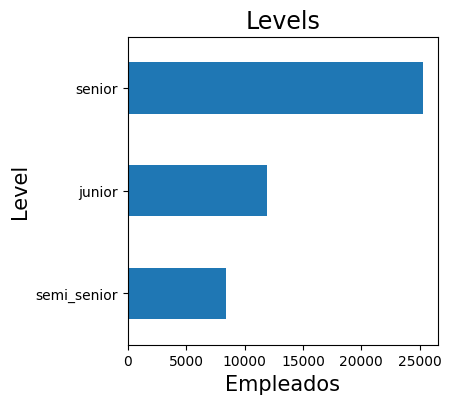

In [1540]:
# grafico
level = df['level'].value_counts(ascending = False).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Levels', size=17)
plt.xlabel('Empleados', size = 15)
plt.ylabel('Level', size = 15)
plt.show();

In [1541]:
df.region.value_counts()

west         32261
northeast     6660
south         4748
midwest       1883
Name: region, dtype: int64

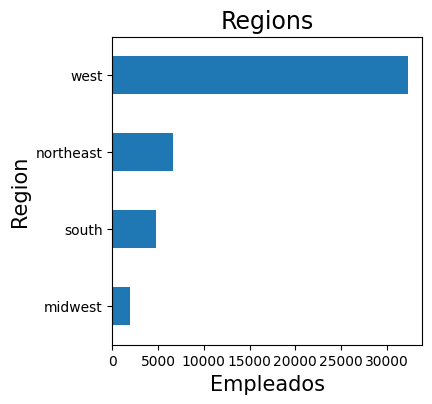

In [1542]:
# grafico
region = df['region'].value_counts(ascending = False).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Regions', size=17)
plt.xlabel('Empleados', size = 15)
plt.ylabel('Region', size = 15)
plt.show();

In [1543]:
df.title.value_counts()

Software Engineer               31816
Product Manager                  3559
Data Scientist                   2095
Software Engineering Manager     1909
Hardware Engineer                1780
Product Designer                 1258
Technical Program Manager        1011
Management Consultant             746
Business Analyst                  712
Solution Architect                666
Name: title, dtype: int64

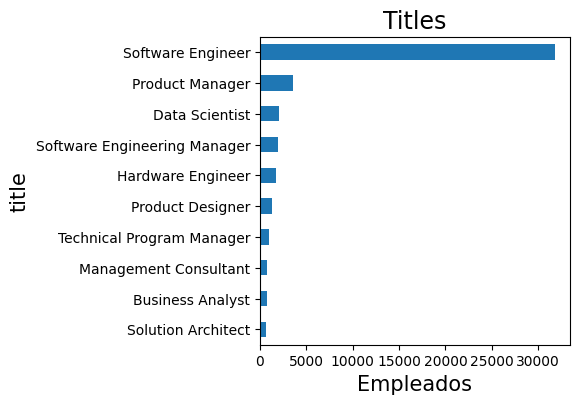

In [1544]:
# grafico
title = df['title'].value_counts(ascending = False).sort_values(ascending = True).plot.barh(figsize = (4,4));
plt.title('Titles', size=17)
plt.xlabel('Empleados', size = 15)
plt.ylabel('title', size = 15)
plt.show();

In [1545]:
# Creamos una funcion para detectar y mostrar que columnas tienen valores nulos
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("El dataset contiene " + str(df.shape[1]) + " columnas y " + str(df.shape[0]) + " filas.\n"      
            "Hay " + str(mz_table.shape[0]) +
              " columnas con valores nulos o NaN. ")
        return mz_table

In [1546]:
missing_zero_values_table(df)

El dataset contiene 19 columnas y 45552 filas.
Hay 0 columnas con valores nulos o NaN. 


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [ ]:
df.columns

Index(['title', 'basesalary', 'totalyearlycompensation', 'yearsofexperience',
       'gender', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Education', 'state',
       'region', 'level'],
      dtype='object')

In [ ]:
# Nos quedaos con las siguientes columnas
df = df[['title', 'basesalary','yearsofexperience', 'gender', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic','region', 'level']]

In [ ]:
# Funcion para obtener en una lista las Variables Categoricas
def v_categoricas(df):
    categorical_feature = (df.dtypes == "category") | (df.dtypes == object)
    categorical_cols = df.columns[categorical_feature].tolist()
    return categorical_cols

v_categoricas(df)


['title', 'gender', 'region', 'level']

In [ ]:
# Funcion para saber el n de cols nuevas que se generan con OHE
def nuevas_cols(df):
    cols=0
    l= v_categoricas(df)
    for col in l:
        val= df[col].nunique()
        cols=cols+val
        print('La variable {} tiene: {} valores unicos'.format(col,val))
    return print('Total variables nuevas: {}'.format(cols))

In [ ]:
nuevas_cols(df)

La variable title tiene: 10 valores unicos
La variable gender tiene: 3 valores unicos
La variable region tiene: 4 valores unicos
La variable level tiene: 3 valores unicos
Total variables nuevas: 20


* 3) Aplicamos el **Método OHE** (dummies)

In [ ]:
# Aplicamos con get_dummies las variables categóricas binarizadas - title
df = pd.get_dummies(df, columns=v_categoricas(df))

In [ ]:
df.dtypes

title                 object
basesalary           float64
yearsofexperience    float64
Masters_Degree         int64
Bachelors_Degree       int64
Doctorate_Degree       int64
Highschool             int64
Some_College           int64
Race_Asian             int64
Race_White             int64
Race_Two_Or_More       int64
Race_Black             int64
Race_Hispanic          int64
gender_Female          uint8
gender_Male            uint8
gender_Unknown         uint8
region_midwest         uint8
region_northeast       uint8
region_south           uint8
region_west            uint8
level_junior           uint8
level_semi_senior      uint8
level_senior           uint8
dtype: object

In [ ]:
cols = ['Bachelors_Degree','Doctorate_Degree'      
        ,'Highschool'             
        ,'Some_College'           
        ,'Race_Asian'             
        ,'Race_White'             
        ,'Race_Two_Or_More'       
        ,'Race_Black'           
        ,'Race_Hispanic'          
        ,'gender_Female'          
        ,'gender_Male'           
        ,'gender_Unknown'         
        ,'region_midwest'         
        ,'region_northeast'       
        ,'region_south'           
        ,'region_west'            
        ,'level_junior'           
        ,'level_semi_senior'      
        ,'level_senior']
for col in cols:
    df[col] = df[col].astype('float64')
         


Renombramos las variables de una manera mas clara: todas en minuscula

In [ ]:
df = df.rename(columns=str.lower)
df.columns

Index(['basesalary', 'yearsofexperience', 'masters_degree', 'bachelors_degree',
       'doctorate_degree', 'highschool', 'some_college', 'race_asian',
       'race_white', 'race_two_or_more', 'race_black', 'race_hispanic',
       'title_business analyst', 'title_data scientist',
       'title_hardware engineer', 'title_management consultant',
       'title_product designer', 'title_product manager',
       'title_software engineer', 'title_software engineering manager',
       'title_solution architect', 'title_technical program manager',
       'gender_female', 'gender_male', 'gender_unknown', 'region_midwest',
       'region_northeast', 'region_south', 'region_west', 'level_junior',
       'level_semi_senior', 'level_senior'],
      dtype='object')

## Correlación de las Variables

In [ ]:
df.corr()

,basesalary,yearsofexperience,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,...,gender_female,gender_male,gender_unknown,region_midwest,region_northeast,region_south,region_west,level_junior,level_semi_senior,level_senior
basesalary,1.000000,0.537561,0.052487,-0.135998,0.102441,-0.002475,-0.006958,-0.018218,-0.043252,-0.020879,...,-0.069074,-0.016001,0.064820,-0.176610,-0.033421,-0.236293,0.262149,-0.460855,-0.111933,0.494636
yearsofexperience,0.537561,1.000000,0.070355,-0.070713,-0.008537,0.009300,0.019727,-0.023990,0.031877,-0.023169,...,-0.068752,0.019612,0.026708,-0.012534,-0.057032,0.008832,0.043879,-0.645553,-0.266385,0.778274
masters_degree,0.052487,0.070355,1.000000,-0.266607,-0.080515,-0.035192,-0.039130,0.359288,-0.002168,0.001896,...,0.096205,0.178840,-0.256837,-0.014510,-0.031169,0.003541,0.028199,-0.097968,0.020905,0.070315
bachelors_degree,-0.135998,-0.070713,-0.266607,1.000000,-0.082670,-0.028436,-0.031618,0.196469,0.408513,0.131373,...,0.093194,0.176443,-0.252204,0.061963,0.056689,0.084433,-0.127949,0.081337,0.001639,-0.073181
doctorate_degree,0.102441,-0.008537,-0.080515,-0.082670,1.000000,-0.010891,-0.012110,0.044262,0.047265,0.004444,...,0.000386,0.059195,-0.063244,-0.023522,-0.012391,-0.021542,0.034412,0.000790,-0.001274,0.000295
highschool,-0.002475,0.009300,-0.035192,-0.028436,-0.010891,1.000000,-0.004165,-0.007701,0.097203,0.022609,...,-0.015696,0.040196,-0.031903,0.019845,0.000148,0.008578,-0.014571,-0.010996,-0.002079,0.011341
some_college,-0.006958,0.019727,-0.039130,-0.031618,-0.012110,-0.004165,1.000000,-0.012106,0.111715,0.033624,...,-0.006818,0.045002,-0.043159,-0.001108,0.004858,0.019208,-0.016202,-0.013181,-0.007185,0.017252
race_asian,-0.018218,-0.023990,0.359288,0.196469,0.044262,-0.007701,-0.012106,1.000000,-0.164668,-0.051778,...,0.132065,0.207514,-0.312158,-0.006700,-0.012210,0.004565,0.009355,0.005038,0.025282,-0.024155
race_white,-0.043252,0.031877,-0.002168,0.408513,0.047265,0.097203,0.111715,-0.164668,1.000000,-0.039512,...,0.056555,0.185493,-0.236479,0.072068,0.049039,0.072544,-0.118438,-0.035802,-0.003663,0.034504
race_two_or_more,-0.020879,-0.023169,0.001896,0.131373,0.004444,0.022609,0.033624,-0.051778,-0.039512,1.000000,...,0.021639,0.044857,-0.062696,0.002897,0.007489,0.014183,-0.016623,0.022213,-0.002942,-0.017344


<AxesSubplot: >

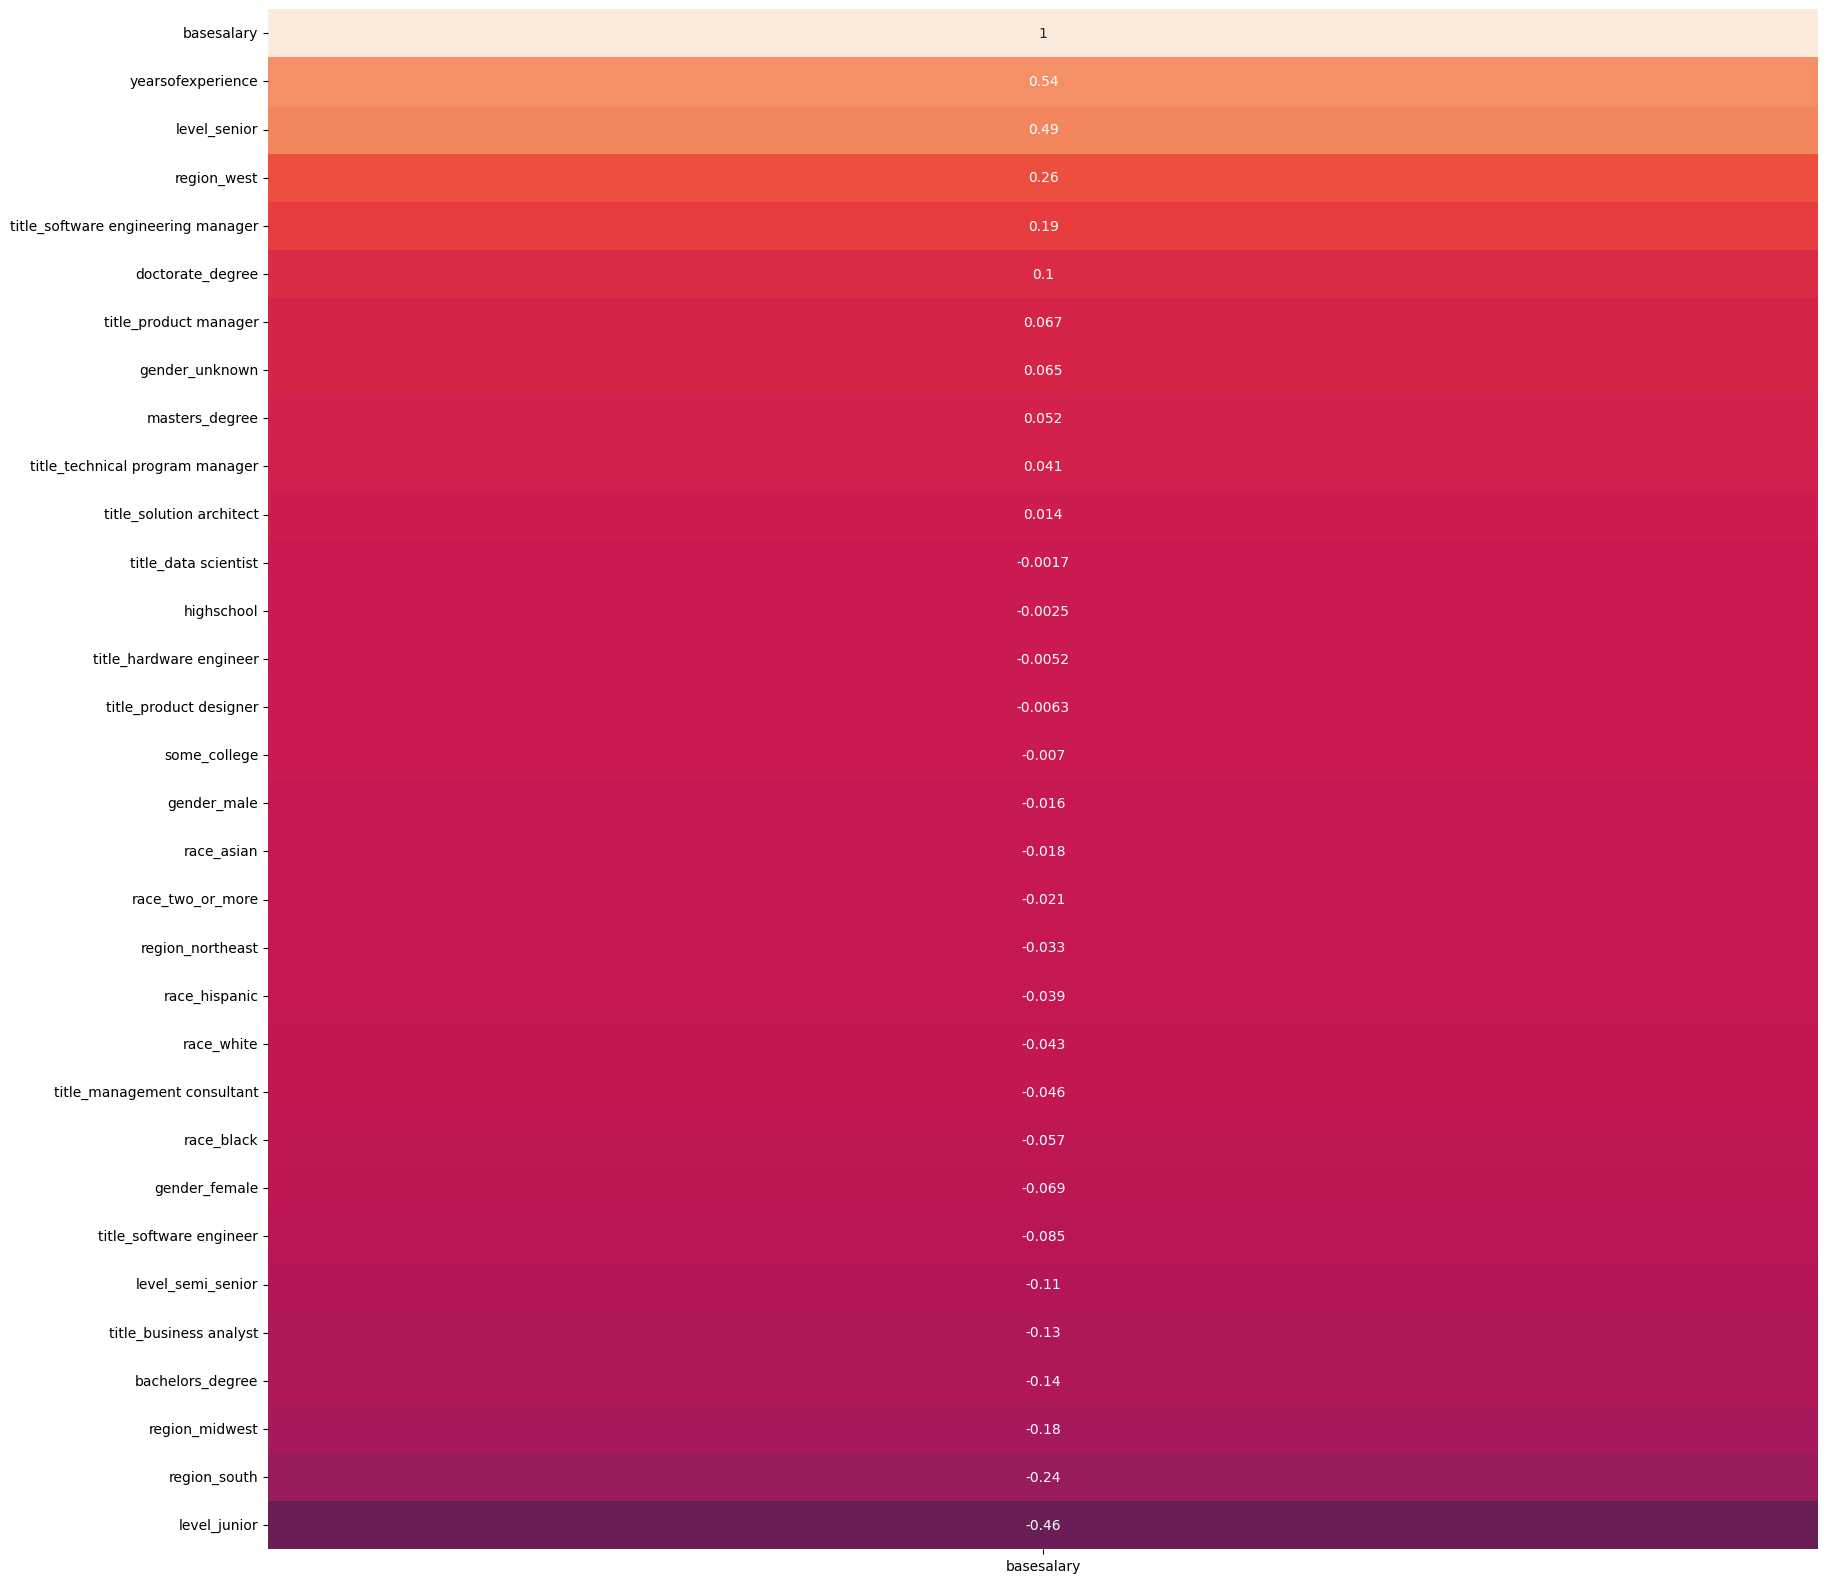

In [ ]:
plt.figure(figsize= [20,20])
sns.heatmap(df.corr()[['basesalary']].sort_values(by='basesalary', ascending=False), vmin=-1, vmax=1, annot=True, cbar=False)

## 4. Transformaciones y escalado Variables Numéricas
Como tenemos valores con diferentes magnitudes, merece la pena realizar una homogeniciasion (poner los datos en una misma escala) de los valores (esto sirve tambien para tener menos coste computacional). Los datos no cambian, sino que es mas facil para el modelo. <br>

- **Min-Max**: entre el min y max, tenemos entre -1 y 1 
- **Max Abs**: se coge el max abs 
- **Estandarización**: quitamos la media de cada obs y tenemos 1 de varianza
- **Normalización**: la curva normal, normalizar los valores

In [ ]:
# Funcion para obtener en una lista las Variables Numericas
def v_numericas(df):
    numerical_feature = (df.dtypes != "category") & (df.dtypes != object)
    numerical_cols = df.columns[numerical_feature].tolist()
    return numerical_cols

v_numericas(df)

['basesalary',
 'yearsofexperience',
 'masters_degree',
 'bachelors_degree',
 'doctorate_degree',
 'highschool',
 'some_college',
 'race_asian',
 'race_white',
 'race_two_or_more',
 'race_black',
 'race_hispanic',
 'title_business analyst',
 'title_data scientist',
 'title_hardware engineer',
 'title_management consultant',
 'title_product designer',
 'title_product manager',
 'title_software engineer',
 'title_software engineering manager',
 'title_solution architect',
 'title_technical program manager',
 'gender_female',
 'gender_male',
 'gender_unknown',
 'region_midwest',
 'region_northeast',
 'region_south',
 'region_west',
 'level_junior',
 'level_semi_senior',
 'level_senior']

In [ ]:
df.dtypes

basesalary                            float64
yearsofexperience                     float64
masters_degree                          int64
bachelors_degree                        int64
doctorate_degree                        int64
highschool                              int64
some_college                            int64
race_asian                              int64
race_white                              int64
race_two_or_more                        int64
race_black                              int64
race_hispanic                           int64
title_business analyst                  uint8
title_data scientist                    uint8
title_hardware engineer                 uint8
title_management consultant             uint8
title_product designer                  uint8
title_product manager                   uint8
title_software engineer                 uint8
title_software engineering manager      uint8
title_solution architect                uint8
title_technical program manager   

In [ ]:
# Escalado Min- Max
X_esc_min_max= df.drop(columns='basesalary')
for v in v_numericas(df)[1:]:
    X = X_esc_min_max[v].values.reshape(-1,1)
    X_transf_minmax = MinMaxScaler().fit_transform(X)
    X_esc_min_max[v]=X_transf_minmax

X_esc_min_max

,yearsofexperience,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,race_black,...,gender_female,gender_male,gender_unknown,region_midwest,region_northeast,region_south,region_west,level_junior,level_semi_senior,level_senior
0,0.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50695,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
50696,0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50697,0.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Escalado Max absoluto
X_esc_max_abs= df.drop(columns='basesalary')
for v in v_numericas(df)[1:]:
    X = X_esc_max_abs[v].values.reshape(-1,1)
    X_transf_maxAbs = MaxAbsScaler().fit_transform(X)
    X_esc_max_abs[v]=X_transf_maxAbs

X_esc_max_abs

,yearsofexperience,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,race_black,...,gender_female,gender_male,gender_unknown,region_midwest,region_northeast,region_south,region_west,level_junior,level_semi_senior,level_senior
0,0.078947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50695,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
50696,0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50697,0.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#Normalización
X_nor= df.drop(columns='basesalary')
for v in v_numericas(df)[1:]:
    X = X_nor[v].values.reshape(-1,1)
    X_transf_norm = normalize(X, norm='l2',axis=0)
    X_nor[v]=X_transf_norm

X_nor
    

,yearsofexperience,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,race_black,...,gender_female,gender_male,gender_unknown,region_midwest,region_northeast,region_south,region_west,level_junior,level_semi_senior,level_senior
0,0.000923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.009166,0.0,0.000000
1,0.003076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.000000,0.0,0.006289
2,0.004922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.000000,0.0,0.006289
3,0.004307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.000000,0.0,0.006289
4,0.003076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.000000,0.0,0.006289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,0.006153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.000000,0.0,0.006289
50695,0.001231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.009166,0.0,0.000000
50696,0.008614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.000000,0.0,0.006289
50697,0.004922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.008289,0.0,0.0,0.0,0.005568,0.000000,0.0,0.006289


In [ ]:
# Estandarizacion
X_estandarizado= df.drop(columns='basesalary')
for v in v_numericas(df)[1:]:
    X = X_estandarizado[v].values.reshape(-1,1)
    X_transf_estand = StandardScaler().fit_transform(X)
    X_estandarizado[v]=X_transf_estand

X_estandarizado


,yearsofexperience,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,race_black,...,gender_female,gender_male,gender_unknown,region_midwest,region_northeast,region_south,region_west,level_junior,level_semi_senior,level_senior
0,-0.987653,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,1.681445,-0.474456,-1.116710
1,-0.229187,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
2,0.420926,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
3,0.204222,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
4,-0.229187,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,0.854335,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
50695,-0.879301,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,1.681445,-0.474456,-1.116710
50696,1.721153,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
50697,0.420926,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488


# **Baseline Modelling**

> Ya tenemos preparado nuestro dataset para aplicar los algoritmos para predecir la variable target --> `basesalary`.<br>

> A la hora de analizar los Modelos se tendrán en cuenta las metricas R2 y el MAE. 

1°) Creamos una Funcion con todos los **Modelos de Regresion**: aplicaremos 9 Modelos.

In [ ]:
def Modelos_Regresion(X_train,X_test,y_train,y_test):
    svr=SVR()
    lr=LinearRegression()
    r=Ridge()
    l=Lasso()
    e=ElasticNet()
    et=ExtraTreeRegressor()
    rf=RandomForestRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    
    modelos=[svr,lr,r,l,e,et,rf,dt,xgb]
    modelos_names=['SVR','LinearRegressor','Ridge','Lasso','ElasticNet','ExtraTree','RandomForest','DecisionTree', 'XGBRegressor']
    
    # Metricas
    r2=[]
    mse=[]
    mae=[]
    mape=[]
    
    result=pd.DataFrame(columns=['R_square','MSE','MAE','MAPE'],index=modelos_names)
    
    for modelo in modelos:
        y_pred=modelo.fit(X_train,y_train).predict(X_test)
        
        r2.append(round(r2_score(y_test,y_pred),2))
        mse.append(round(mean_squared_error(y_test,y_pred),2))
        mae.append(round(mean_absolute_error(y_test,y_pred),2))
        mape.append(round(mean_absolute_percentage_error(y_test, y_pred),2))
    
    result.R_square=r2
    result.MSE=mse
    result.MAE=mae
    result.MAPE=mape
    
    return result.sort_values('R_square',ascending=False)

# **1°) Modelos Originales**

> En esta primer etapa probamos los Modelos Originales con los datos y columnas originales, sin realizarles ningun escalado.

In [ ]:
# Variables Independientes/Predictoras
X = df.drop('basesalary', axis=1).values

In [ ]:
X.shape

(45552, 31)

In [ ]:
# Variable Dependiente/Target
y = df['basesalary'].values

In [ ]:
y.shape

(45552,)

Separamos **Train-Test Split**

In [ ]:
# Procederemos con la separación del conjunto de Train (entreno) y Test (validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
Modelos_Regresion(X_train,X_test,y_train,y_test)

,R_square,MSE,MAE,MAPE
LinearRegressor,0.44,6.986512e+08,20648.99,0.15
Ridge,0.44,6.986774e+08,20648.28,0.15
Lasso,0.44,6.986433e+08,20647.70,0.15
XGBRegressor,0.44,6.948775e+08,20481.13,0.15
RandomForest,0.41,7.325830e+08,20960.75,0.15
ExtraTree,0.36,8.001558e+08,21727.74,0.16
DecisionTree,0.36,7.977301e+08,21736.01,0.16
ElasticNet,0.35,8.101245e+08,22387.16,0.17
SVR,0.09,1.139062e+09,26882.90,0.20


**Conclusiones**
> En esta fase se descarta el SVR, observando el bajo R2 lo que indica un grado de prediccion casi nulo, sumado a que este tipo de modelo además cuenta con un gran coste computacional. 

> **LinearRegressor** y **XGBRegressor** parecen ser los más óptimos.

> A priori si observamos las métricas, el grado de predicción no parece ser alentador. Una de las posibles causas puede ser la falta de datos, es decir, se necesitaria un mayor volumen de registros. Y otro factor, es la falta de datos por titles, es decir, los datos no estan balanceados segun los titles lo que afecta notablemente a la hora de realizar predicciones sobre un determinado trabajo. Tambien el rango de los salarios influye debido a lo que se menciono anteriormente.

# **2°) Modelos Originales con Escalados**

En esta segunda etapa probamos con los distintos escalados todos los Modelos para ver si se logra alguna mejoria en alguno.

Creamos una nueva funcion con 8 Modelos (descartando el SVR)

In [ ]:
def Modelos_Regresion(X_train,X_test,y_train,y_test):
    lr=LinearRegression()
    r=Ridge()
    l=Lasso()
    e=ElasticNet()
    et=ExtraTreeRegressor()
    rf=RandomForestRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    
    modelos=[lr,r,l,e,et,rf,dt,xgb]
    modelos_names=['LinearRegressor','Ridge','Lasso','ElasticNet','ExtraTree','RandomForest','DecisionTree', 'XGBRegressor']
    
    # Metricas
    r2=[]
    mse=[]
    mae=[]
    mape=[]
    
    result=pd.DataFrame(columns=['R_square','MSE','MAE','MAPE'],index=modelos_names)
    
    for modelo in modelos:
        y_pred=modelo.fit(X_train,y_train).predict(X_test)
        
        r2.append(round(r2_score(y_test,y_pred),2))
        mse.append(round(mean_squared_error(y_test,y_pred),2))
        mae.append(round(mean_absolute_error(y_test,y_pred),2))
        mape.append(round(mean_absolute_percentage_error(y_test, y_pred),2))
    
    result.R_square=r2
    result.MSE=mse
    result.MAE=mae
    result.MAPE=mape
    
    return result.sort_values('R_square',ascending=False)

### 2.a Escalado **Estandarizado**

In [ ]:
# Variables Independientes/Predictoras
X = X_estandarizado

# Variable Dependiente/Target
y = df['basesalary'].values

In [ ]:
X.shape

(45552, 31)

In [ ]:
y.shape

(45552,)

Separamos **Train-Test Split**

In [ ]:
# Procederemos con la separación del conjunto de Train (entreno) y Test (validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
Modelos_Regresion(X_train,X_test,y_train,y_test)

,R_square,MSE,MAE,MAPE
LinearRegressor,0.44,6.986450e+08,20648.21,0.15
Ridge,0.44,6.986862e+08,20648.35,0.15
Lasso,0.44,6.986813e+08,20648.29,0.15
XGBRegressor,0.44,6.948290e+08,20480.23,0.15
ElasticNet,0.42,7.200857e+08,21131.65,0.16
RandomForest,0.41,7.350226e+08,20987.98,0.15
ExtraTree,0.36,7.999432e+08,21751.79,0.16
DecisionTree,0.36,7.986002e+08,21747.53,0.16


### 2.b Escalado **Normalizado**

In [ ]:
# Variables Independientes/Predictoras
X = X_nor

# Variable Dependiente/Target
y = df['basesalary'].values

Separamos **Train-Test Split**

In [ ]:
# Procederemos con la separación del conjunto de Train (entreno) y Test (validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
Modelos_Regresion(X_train,X_test,y_train,y_test)

,R_square,MSE,MAE,MAPE
LinearRegressor,0.44,6.985412e+08,20649.62,0.15
Lasso,0.44,6.986528e+08,20669.69,0.15
XGBRegressor,0.44,6.948007e+08,20480.31,0.15
RandomForest,0.41,7.344513e+08,20989.25,0.15
ExtraTree,0.36,7.949052e+08,21695.10,0.16
DecisionTree,0.36,7.992965e+08,21746.72,0.16
Ridge,0.31,8.550815e+08,23210.55,0.17
ElasticNet,0.00,1.246121e+09,28333.99,0.22


### 2.c Escalado **Escalado Min- Max**

In [ ]:
# Variables Independientes/Predictoras
X = X_esc_min_max
# Variable Dependiente/Target
y = df['basesalary'].values

Separamos **Train-Test Split**

In [ ]:
# Procederemos con la separación del conjunto de Train (entreno) y Test (validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
Modelos_Regresion(X_train,X_test,y_train,y_test)

,R_square,MSE,MAE,MAPE
LinearRegressor,0.44,6.986528e+08,20647.46,0.15
Ridge,0.44,6.986725e+08,20648.45,0.15
Lasso,0.44,6.986405e+08,20647.82,0.15
XGBRegressor,0.44,6.948363e+08,20481.18,0.15
RandomForest,0.41,7.341553e+08,20979.38,0.15
ExtraTree,0.36,7.994946e+08,21748.38,0.16
DecisionTree,0.36,7.956425e+08,21716.39,0.16
ElasticNet,0.26,9.247231e+08,24085.59,0.18


### 2.d Escalado **Escalado Max Absoluto**

In [ ]:
# Variables Independientes/Predictoras
X = X_esc_max_abs

# Variable Dependiente/Target
y = df['basesalary'].values

Separamos **Train-Test Split**

In [ ]:
# Procederemos con la separación del conjunto de Train (entreno) y Test (validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
Modelos_Regresion(X_train,X_test,y_train,y_test)

,R_square,MSE,MAE,MAPE
LinearRegressor,0.44,6.986372e+08,20647.57,0.15
Ridge,0.44,6.986725e+08,20648.45,0.15
Lasso,0.44,6.986405e+08,20647.82,0.15
XGBRegressor,0.44,6.948363e+08,20481.18,0.15
RandomForest,0.41,7.349199e+08,20987.26,0.15
ExtraTree,0.36,7.951857e+08,21709.36,0.16
DecisionTree,0.36,7.979146e+08,21741.26,0.16
ElasticNet,0.26,9.247231e+08,24085.59,0.18


**Conclusiones**
> Luego de realizar los 4 Escalados no hubo una diferencia significativa en cuanto a las métricas, por lo que se opta por dejar el Estandarizado y proseguir con las siguientes etapas para tratar de mejorar los modelos.

In [ ]:
# Variables Independientes/Predictoras
X = X_estandarizado

# Variable Dependiente/Target
y = df['basesalary'].values

# Procederemos con la separación del conjunto de Train (entreno) y Test (validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
X

,yearsofexperience,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,race_black,...,gender_female,gender_male,gender_unknown,region_midwest,region_northeast,region_south,region_west,level_junior,level_semi_senior,level_senior
0,-0.987653,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,1.681445,-0.474456,-1.116710
1,-0.229187,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
2,0.420926,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
3,0.204222,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
4,-0.229187,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50694,0.854335,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
50695,-0.879301,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,1.681445,-0.474456,-1.116710
50696,1.721153,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488
50697,0.420926,-0.574984,-0.464602,-0.177938,-0.061204,-0.068055,-0.464532,-0.354483,-0.111464,-0.104922,...,-0.365841,-1.133742,1.459331,-0.207653,-0.413816,-0.341117,0.641859,-0.594727,-0.474456,0.895488


# **3°) Modelos con las Features mas Importantes**

En esta tercer etapa, a traves del Random Forest obtendremos las features importance, es decir, las columnas que mas relevancia/peso tienen a la hora de realizar predicciones.

***
### **Random Forest**

In [ ]:
# Llamo al Modelo
rf = RandomForestRegressor()

# Entreno el Modelo
rf.fit(X_train,y_train)

# Hago las Predicciones
y_pred = rf.predict(X_test)


In [ ]:
# Caracteristicas mas importantes
rf.feature_importances_


array([0.49971036, 0.01865204, 0.01625212, 0.01913289, 0.00255157,
       0.00313655, 0.01614337, 0.01553597, 0.00566665, 0.00428889,
       0.00640706, 0.02367117, 0.00750819, 0.00924673, 0.01218693,
       0.00664963, 0.00877077, 0.01336553, 0.01201612, 0.00438388,
       0.00520465, 0.01122513, 0.0117498 , 0.01226961, 0.02223395,
       0.03911202, 0.03928036, 0.06519607, 0.0024444 , 0.01474855,
       0.07125905])

In [ ]:
# Creamos un diccionario con las features mas importantes ordenadas de menor a mayor relevancia
dic_fratures = dict(zip(pd.DataFrame(X).columns,rf.feature_importances_))
features = dict(sorted(dic_fratures.items(), key=lambda item:item[1]))
features

{'level_junior': 0.0024443952616826914,
 'highschool': 0.0025515694770692266,
 'some_college': 0.0031365533863535913,
 'race_black': 0.004288889300337247,
 'title_solution architect': 0.004383884387318202,
 'title_technical program manager': 0.005204652239193031,
 'race_two_or_more': 0.0056666515622795085,
 'race_hispanic': 0.006407055739927124,
 'title_product designer': 0.006649628956194321,
 'title_data scientist': 0.007508185076494027,
 'title_product manager': 0.008770771612651529,
 'title_hardware engineer': 0.00924672896096399,
 'gender_female': 0.011225131921401878,
 'gender_male': 0.011749797949257871,
 'title_software engineering manager': 0.012016122798247387,
 'title_management consultant': 0.012186932634494255,
 'gender_unknown': 0.012269606054467676,
 'title_software engineer': 0.013365534578430895,
 'level_semi_senior': 0.014748546662789075,
 'race_white': 0.015535970831787304,
 'race_asian': 0.016143373323715817,
 'bachelors_degree': 0.01625212486958766,
 'masters_degre

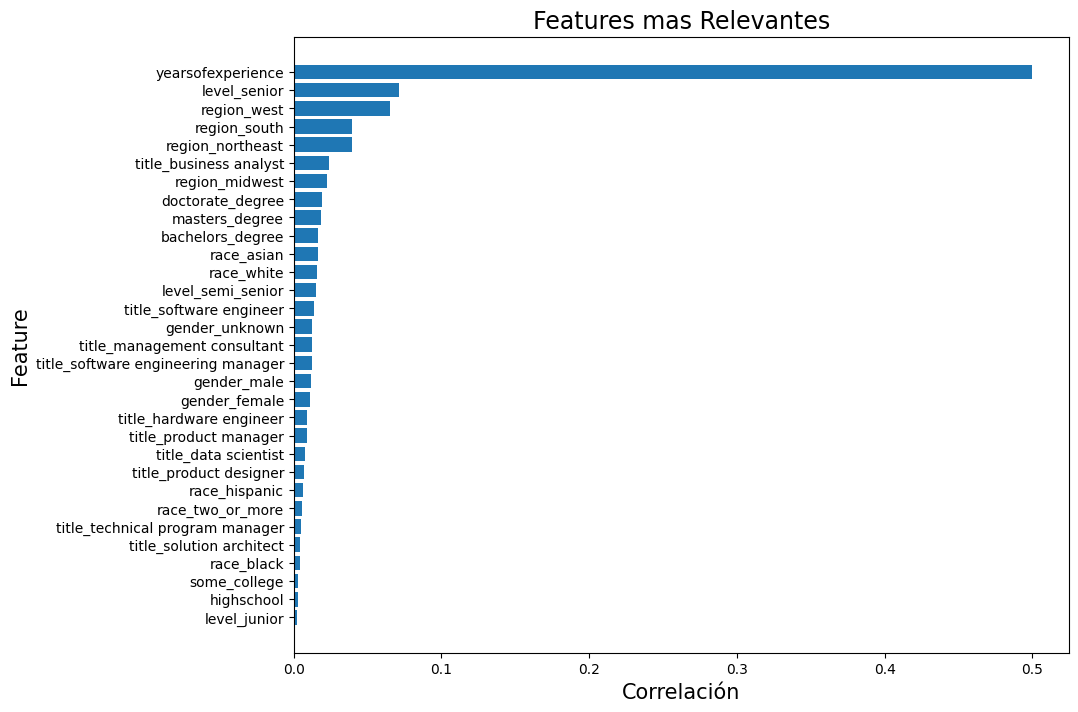

In [ ]:
# Grafico Barh de las Features segun correlacion con la target
d = pd.DataFrame([[key, features[key]] for key in features.keys()], columns=['Feature', 'Relevancia'])
d.sort_values(by=['Relevancia'], ascending=False)
fig, ax = plt.subplots(figsize=(10,8))
plt.barh(d.Feature, d.Relevancia)
plt.title('Features mas Relevantes', size=17)
plt.xlabel('Correlación', size = 15)
plt.ylabel('Feature', size = 15)
plt.show();

> Procederemos a eliminar las ultimas 4 variable para comprobar si mejoran las Métricas, de lo contrario se procedera con todas las variables originales.

> Se eliminaran de acuerdo a su correlacion, es decir, las de menor correlacion (observar gráfico)

In [ ]:
df.columns

Index(['basesalary', 'yearsofexperience', 'masters_degree', 'bachelors_degree',
       'doctorate_degree', 'highschool', 'some_college', 'race_asian',
       'race_white', 'race_two_or_more', 'race_black', 'race_hispanic',
       'title_business analyst', 'title_data scientist',
       'title_hardware engineer', 'title_management consultant',
       'title_product designer', 'title_product manager',
       'title_software engineer', 'title_software engineering manager',
       'title_solution architect', 'title_technical program manager',
       'gender_female', 'gender_male', 'gender_unknown', 'region_midwest',
       'region_northeast', 'region_south', 'region_west', 'level_junior',
       'level_semi_senior', 'level_senior'],
      dtype='object')

Eliminando las 4 Features con menor correlación

In [ ]:
# Variables Independientes/Predictoras
X = X_estandarizado.drop(['level_senior','highschool','some_college','race_black'], axis=1).values
# Variable Dependiente/Target
y = df['basesalary'].values

# Procederemos con la separación del conjunto de Train (entreno) y Test (validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
Modelos_Regresion(X_train,X_test,y_train,y_test)

,R_square,MSE,MAE,MAPE
LinearRegressor,0.44,6.988334e+08,20647.79,0.15
Ridge,0.44,6.987059e+08,20649.39,0.15
Lasso,0.44,6.987032e+08,20649.41,0.15
XGBRegressor,0.44,6.924821e+08,20459.66,0.15
ElasticNet,0.42,7.265852e+08,21241.26,0.16
RandomForest,0.41,7.312225e+08,20935.19,0.15
ExtraTree,0.36,7.939854e+08,21690.60,0.16
DecisionTree,0.36,7.935211e+08,21678.41,0.16


**Conclusiones**
> Debido a que no se noto una mejoría en las Métricas al realizar una Reducción de Dimensión, se decide utilizar todas las features originales.

> Nos quedaremos con los Modelos: 
* **1° XGBRegressor**
* **2° RandomForest**

> En la siguiente etapa le realizaremos una Optimizacion de los Hiperparámetros a los 2 Modelos elegidos.

***
# **4°) Modelos con Optimización de los Hiperparámetros**

En esta 4 etapa tomaremos el XGBRegressor  y RandomForest y les aplicaremos el **GridSearchCV** cuya funcion es mejorarlos a través de la optimizacion de los parámetros. A su vez, realiza una Validacion Cruzada la cual usaremos un k=3 para reducir los tiempos y sobretodo para no tener Overfitting

In [ ]:
# Funcion que me devuelve las Metricas de Regresión
def eval_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred) # es la diferencia entre el valor y_predicho y el real promedio ( es el promedio de todas las y_predicciones)
    r2 = r2_score(y_test, y_pred)  # me da entre 0 y 1
    mape = mean_absolute_percentage_error(y_test, y_pred) # me da un valor que es + y - de lo que se esta equivocando,la v target es un precio entonces el error es + - ese valor 
    
    return rmse, mse, mae, r2, mape

***
### **1.a) XGBRegressor**

In [ ]:
# Variables Independientes/Predictoras
X = X_estandarizado

# Variable Dependiente/Target
y = df['basesalary'].values

# Procederemos con la separación del conjunto de Train (entreno) y Test (validación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
xgb = XGBRegressor()

In [ ]:
# Entreno
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Hago la Prediccion
y_pred = xgb.predict(X_test)

In [ ]:
y_pred

array([143651.17, 179189.1 , 136437.12, ..., 133257.77, 177583.38,
       164198.75], dtype=float32)

In [ ]:
(rmse, mse, mae, r2, mape) = eval_metrics(y_test, y_pred)
print('"Root Mean square error": %.2f' % rmse)
print('"Mean squared error": %.2f' % mse)
print('"Mean Absolute error": %.2f' % mae)
print('"R2": %.4f' % r2)
print('"Mean Absolute Precision error": %.2f' % mape)

"Root Mean square error": 26359.61
"Mean squared error": 694829042.77
"Mean Absolute error": 20480.23
"R2": 0.4424
"Mean Absolute Precision error": 0.15


### **1.b) XGBRegressor con GridSearchCV** 

In [ ]:
xgb_g = XGBRegressor()

Hiperparámetros

In [ ]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
XGBRegressor?

Init signature:
XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid valu

In [ ]:
# Parametros que toma por defecto
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Para evitar que los tiempos en la busqueda de los mejores hiperparametros sean muy largos, se seleccionan solo algunos

In [ ]:
parametros_xgb = {
    'max_depth':[3,4,5,6],
    'min_child_weight':[3,4,5,6,8],
    'gamma': [i/10.0 for i in range(0,5)],
    'learning_rate':[0.01,0.05,0.1,0.2]
}

In [ ]:
# lo guardamos en una variable
xgb_grid = GridSearchCV(estimator=xgb_g, param_grid=parametros_xgb, cv=3)

In [ ]:
# Entreno con el ajuste
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [3, 4, 5, 6, 8]})

In [ ]:
# Obtenemos el modelo optimizado con los mejores parametros
modelo_optimizado = xgb_grid.best_estimator_

In [ ]:
xgb_grid.best_score_

0.46019384429049426

In [ ]:
# Predecimos con los mejores parametros
y_pred_grid = modelo_optimizado.predict(X_test)

In [ ]:
y_pred_grid

array([141942.67, 178692.92, 136130.6 , ..., 133886.1 , 176370.62,
       163826.83], dtype=float32)

Metricas

In [ ]:
(rmse, mse, mae, r2, mape) = eval_metrics(y_test, y_pred_grid)
print('"Root Mean square error": %.2f' % rmse)
print('"Mean squared error": %.2f' % mse)
print('"Mean Absolute error": %.2f' % mae)
print('"R2": %.4f' % r2)
print('"Mean Absolute Precision error": %.2f' % mape)

"Root Mean square error": 26054.56
"Mean squared error": 678840150.32
"Mean Absolute error": 20309.77
"R2": 0.4552
"Mean Absolute Precision error": 0.15


**Conclusiones**
> Utilizando el GridSearchCV para optimizar los hiperparámetros se obtuvo una mejoria en el R2 de aprox 1,5%.

> Tambien se logró reducir el MAE.

> Decidimos llevar a Produccion este modelo ya que es el con el que mejores Metricas obtuvimos a pesar de que no sean las óptimas a la hora de obtener buenas predicciones.


***
### **Guardado de Modelos**


Guardamos el Modelos **XGBRegressor**

In [ ]:
model_xgb = xgb_grid

In [ ]:
filename = 'model_xgb.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(model_xgb, archivo_salida)

Guardamos el best model **XGBRegressor con GridSearchCV**

In [ ]:
model_xgb_gs = modelo_optimizado

In [ ]:
filename = 'model_xgb_gs.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(best_model, archivo_salida)

In [ ]:
modelo = pickle.load(open(f'/Users/santi/Bootcamp/Salarios en STEM/src/model/best_model.pkl','rb'))

***
### **2.a) RandomForest**

In [ ]:
rf = RandomForestRegressor()

In [ ]:
# Entreno
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Hago la Prediccion
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([132386.95544352, 132238.67791571, 147127.62698413, ...,
       144295.43200554, 116014.56512932, 175423.63095238])

Metricas

In [ ]:
(rmse, mse, mae, r2, mape) = eval_metrics(y_test, y_pred)
print('"Root Mean square error": %.2f' % rmse)
print('"Mean squared error": %.2f' % mse)
print('"Mean Absolute error": %.2f' % mae)
print('"R2": %.4f' % r2)
print('"Mean Absolute Precision error": %.2f' % mape)

"Root Mean square error": 27173.08
"Mean squared error": 738376413.53
"Mean Absolute error": 21205.29
"R2": 0.4192
"Mean Absolute Precision error": 0.15


### **2.b) RandomForest con GridSearchCV** 

In [ ]:
rf_g = RandomForestRegressor()

Hiperparámetros

In [ ]:
rf

RandomForestRegressor()

In [ ]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versioncha

In [ ]:
# Parametros que toma por defecto
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Creamos un diccionario con los hiperparametros que vamos a tener en cuenta
n_estimators = np.arange(10,100,10) # Numero de arboles en el randomforest
max_features = ["sqrt","auto"] # Numero de features a considerar en cada split
max_depth = [2,4] # Maxima numero de niveles/profundidad en cada arbol
min_samples_split = [2,5] # Minimo numero de samples requeridos para dividir un nodo
min_samples_leaf = [1,2] # 

parametros_rf = {'n_estimators': n_estimators,
                 'max_features': max_features,
                 'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf':min_samples_leaf
}

In [ ]:
# lo guardamos en una variable
rf_grid = GridSearchCV(estimator=rf_g, param_grid=parametros_rf, cv=3)

In [ ]:
# Entreno con el ajuste
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4], 'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [ ]:
# Obtenemos el modelo optimizado con los mejores parametros
modelo_optimizado = rf_grid.best_estimator_

In [ ]:
rf_grid.best_score_

0.4241835740991071

In [ ]:
# Predecimos con los mejores parametros
y_pred_grid = modelo_optimizado.predict(X_test)

In [ ]:
y_pred_grid

array([131489.34069629, 131489.34069629, 151470.35390712, ...,
       144853.13449704, 122142.96783824, 176987.40704109])

Metricas

In [ ]:
(rmse, mse, mae, r2, mape) = eval_metrics(y_test, y_pred_grid)
print('"Root Mean square error": %.2f' % rmse)
print('"Mean squared error": %.2f' % mse)
print('"Mean Absolute error": %.2f' % mae)
print('"R2": %.4f' % r2)
print('"Mean Absolute Precision error": %.2f' % mape)

"Root Mean square error": 27347.33
"Mean squared error": 747876580.79
"Mean Absolute error": 21430.87
"R2": 0.4118
"Mean Absolute Precision error": 0.16


***
